In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [5]:
#sample data set
N=1000
Tp=800
t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df=pd.DataFrame(x)
df.head()

,0
0,1.684544
1,1.298236
2,0.805577
3,0.683344
4,0.547871


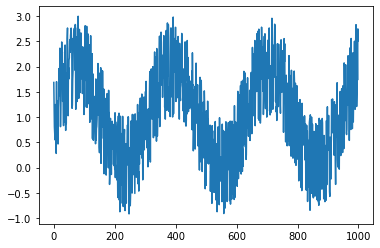

In [6]:
plt.plot(df)
plt.show()

In [7]:
df

,0
0,1.684544
1,1.298236
2,0.805577
3,0.683344
4,0.547871
...,...
995,1.460770
996,2.380504
997,1.732418
998,2.744357


In [8]:
values=df.values
values

array([[ 1.68454356],
       [ 1.29823579],
       [ 0.80557703],
       [ 0.68334376],
       [ 0.54787107],
       [ 1.24815589],
       [ 0.58698151],
       [ 0.99047402],
       [ 0.27981334],
       [ 1.70040233],
       [ 0.55631592],
       [ 1.1814058 ],
       [ 1.28252052],
       [ 1.31837182],
       [ 0.46605892],
       [ 1.17887357],
       [ 1.36057549],
       [ 1.95852255],
       [ 1.42532112],
       [ 1.61987918],
       [ 2.36291089],
       [ 2.05882658],
       [ 0.8090465 ],
       [ 1.2691695 ],
       [ 1.72419411],
       [ 1.65503967],
       [ 2.48572221],
       [ 2.15811559],
       [ 2.2894618 ],
       [ 1.30976083],
       [ 1.37076426],
       [ 1.34155462],
       [ 0.83011243],
       [ 2.05545918],
       [ 1.57888219],
       [ 1.76598559],
       [ 0.90043694],
       [ 2.42515434],
       [ 2.01304533],
       [ 0.73550462],
       [ 1.6953836 ],
       [ 0.87180739],
       [ 1.86432001],
       [ 1.24865909],
       [ 2.55386476],
       [ 2

In [9]:
train = values[0:Tp,:]
train.shape

(800, 1)

In [10]:
test= values[Tp:N,:]
test.shape

(200, 1)

In [11]:
step=4
test=np.append(test,np.repeat(test[-1],step))
train=np.append(train,np.repeat(train[-1,],step))

In [12]:
def convertToMatrix(data,step):
    X=[]
    Y=[]
    for i in range(len(data)-step):
        d=i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X),np.array(Y)

trainX,trainY=convertToMatrix(train,step)
testX,testY=convertToMatrix(test,step)

In [13]:
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))
trainX.shape
testX.shape


(200, 1, 4)

In [14]:
model=Sequential()
model.add(SimpleRNN(units=32,input_shape=(1,step),activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1184      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


model.fit(trainX,trainY, epochs=100,batch_size=16,verbose=2)
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)
predicted=np.concentrate((trainPredict,testPredict),axis=0)


In [17]:
trainScore=model.evaluate(trainX,trainY,verbose=0)
print(trainScore)

0.35856664180755615


In [16]:
model.fit(trainX,trainY, epochs=100,batch_size=16,verbose=2) 
trainPredict=model.predict(trainX) 
testPredict=model.predict(testX)
predicted=np.concentrate((trainPredict,testPredict),axis=0)

Epoch 1/100
50/50 - 1s - loss: 0.9266 - 677ms/epoch - 14ms/step
Epoch 2/100
50/50 - 0s - loss: 0.4470 - 38ms/epoch - 758us/step
Epoch 3/100
50/50 - 0s - loss: 0.4204 - 36ms/epoch - 718us/step
Epoch 4/100
50/50 - 0s - loss: 0.4116 - 37ms/epoch - 738us/step
Epoch 5/100
50/50 - 0s - loss: 0.4086 - 38ms/epoch - 758us/step
Epoch 6/100
50/50 - 0s - loss: 0.4046 - 35ms/epoch - 698us/step
Epoch 7/100
50/50 - 0s - loss: 0.4040 - 39ms/epoch - 778us/step
Epoch 8/100
50/50 - 0s - loss: 0.4033 - 38ms/epoch - 758us/step
Epoch 9/100
50/50 - 0s - loss: 0.4019 - 38ms/epoch - 758us/step
Epoch 10/100
50/50 - 0s - loss: 0.4015 - 40ms/epoch - 798us/step
Epoch 11/100
50/50 - 0s - loss: 0.3998 - 40ms/epoch - 798us/step
Epoch 12/100
50/50 - 0s - loss: 0.3998 - 40ms/epoch - 798us/step
Epoch 13/100
50/50 - 0s - loss: 0.3994 - 38ms/epoch - 758us/step
Epoch 14/100
50/50 - 0s - loss: 0.3996 - 42ms/epoch - 838us/step
Epoch 15/100
50/50 - 0s - loss: 0.3985 - 39ms/epoch - 778us/step
Epoch 16/100
50/50 - 0s - loss: 0.

AttributeError: module 'numpy' has no attribute 'concentrate'